In [250]:
!pip install -q researchpy
#Import the libraries and packages needed
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import seaborn as sns 
import researchpy as rp
from scipy import stats
from array import array

In [251]:
#Read the csv and create a panads dataframe
df = pd.read_csv("Arrests_and_Strip_Searches_(RBDC-ARR-TBL-001).csv")

#Drop the columns that will not be used for this project
df.drop(df.iloc[:, 13:25], inplace=True, axis = 1)
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft


In [252]:
#get information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65276 entries, 0 to 65275
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Arrest_Year                      65276 non-null  int64  
 1   Arrest_Month                     65276 non-null  object 
 2   EventID                          65276 non-null  int64  
 3   ArrestID                         64807 non-null  float64
 4   PersonID                         65276 non-null  int64  
 5   Perceived_Race                   65272 non-null  object 
 6   Sex                              65276 non-null  object 
 7   Age_group__at_arrest_            65252 non-null  object 
 8   Youth_at_arrest__under_18_years  65276 non-null  object 
 9   ArrestLocDiv                     65276 non-null  object 
 10  StripSearch                      65276 non-null  int64  
 11  Booked                           65276 non-null  int64  
 12  Occurrence_Categor

In [253]:
#examining missing values
print("Missing values distribution: ")
print(df.isnull().sum())
print("")

Missing values distribution: 
Arrest_Year                          0
Arrest_Month                         0
EventID                              0
ArrestID                           469
PersonID                             0
Perceived_Race                       4
Sex                                  0
Age_group__at_arrest_               24
Youth_at_arrest__under_18_years      0
ArrestLocDiv                         0
StripSearch                          0
Booked                               0
Occurrence_Category                165
dtype: int64



In [254]:
#We can see that 469 ArrestIDs are missing from the dataset.
#For these events with missing ArrestIDs, we assume that arrests were not made.
#drop the rows with missing ArrestIDs
df = df.loc[df["ArrestID"] > 0]
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft


In [255]:
#sort the dataframe by personID
df.sort_values(by='PersonID')

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category
16372,2020,July-Sept,1042835,6031555.0,300000,East/Southeast Asian,M,Aged 35 to 44 years,Not a youth,XX,0,0,Vehicle Related (inc. Impaired)
38252,2020,Jan-Mar,1013133,6002148.0,300001,White,F,Aged 17 years and younger,Youth (aged 17 and younger),51,0,1,"FTA/FTC, Compliance Check & Parollee"
55323,2020,Apr-June,1008622,6016704.0,300002,White,M,Aged 35 to 44 years,Not a youth,XX,0,0,Assault & Other crimes against persons
55643,2020,July-Sept,1019296,6041043.0,300003,White,M,Aged 25 to 34 years,Not a youth,22,0,1,Other Offence
55645,2021,July-Sept,1023385,6034005.0,300003,White,M,Aged 25 to 34 years,Not a youth,XX,0,1,Drug Related
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40955,2021,Apr-June,1042255,6007649.0,337342,White,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Other Offence
17103,2020,Jan-Mar,1011439,6058391.0,337343,White,M,Aged 35 to 44 years,Not a youth,42,0,1,Assault & Other crimes against persons
35894,2020,Jan-Mar,1042769,6033308.0,337344,Black,M,Aged 18 to 24 years,Not a youth,22,1,1,Weapons & Homicide
60727,2021,Jan-Mar,1054317,6019003.0,337345,Black,M,Aged 65 years and older,Not a youth,XX,0,0,Police Category - Incident


In [256]:
#dropping rows where sex=u (unidentified)
df = df.loc[df["Sex"] != 'U']
df

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft


In [257]:
#By counting the number of times a PersonID appears, we can count the number of times a person has been arrested.
df['PersonID'].value_counts()

327486    54
331300    46
310375    41
303892    39
330299    35
          ..
309949     1
325498     1
318570     1
324886     1
310583     1
Name: PersonID, Length: 37326, dtype: int64

In [258]:
#By summing the times that a person has been booked, we can count the number of times a person has been booked at a police station
#The number of bookings will be used as the response variable for this project
#Add the Number of Bookings as a column back to the original dataframe
df['Number_of_Bookings'] = df.groupby('PersonID')['Booked'].transform('sum')
df

<ipython-input-258-3796cdc7cfa6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_of_Bookings'] = df.groupby('PersonID')['Booked'].transform('sum')


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Number_of_Bookings
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,2
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,1
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0


# EDA

In [259]:
NumofArrests = df['PersonID'].value_counts()
#View the descriptive statistics for the number of arrests
NumofArrests.describe()

count    37326.000000
mean         1.736002
std          2.012477
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         54.000000
Name: PersonID, dtype: float64

This shows that 37329 different people have been arrested. The maximum number of arrests that a person has is 54 times, and the minimum number of arrests that a person has is 1. This makes sense because every person in this pandas series has been arrested at least once. The average number of times a person gets arrested is 1.74. The huge difference between the maximum of 54 and the 75th percentile of 2 suggest that there are extreme outliers.

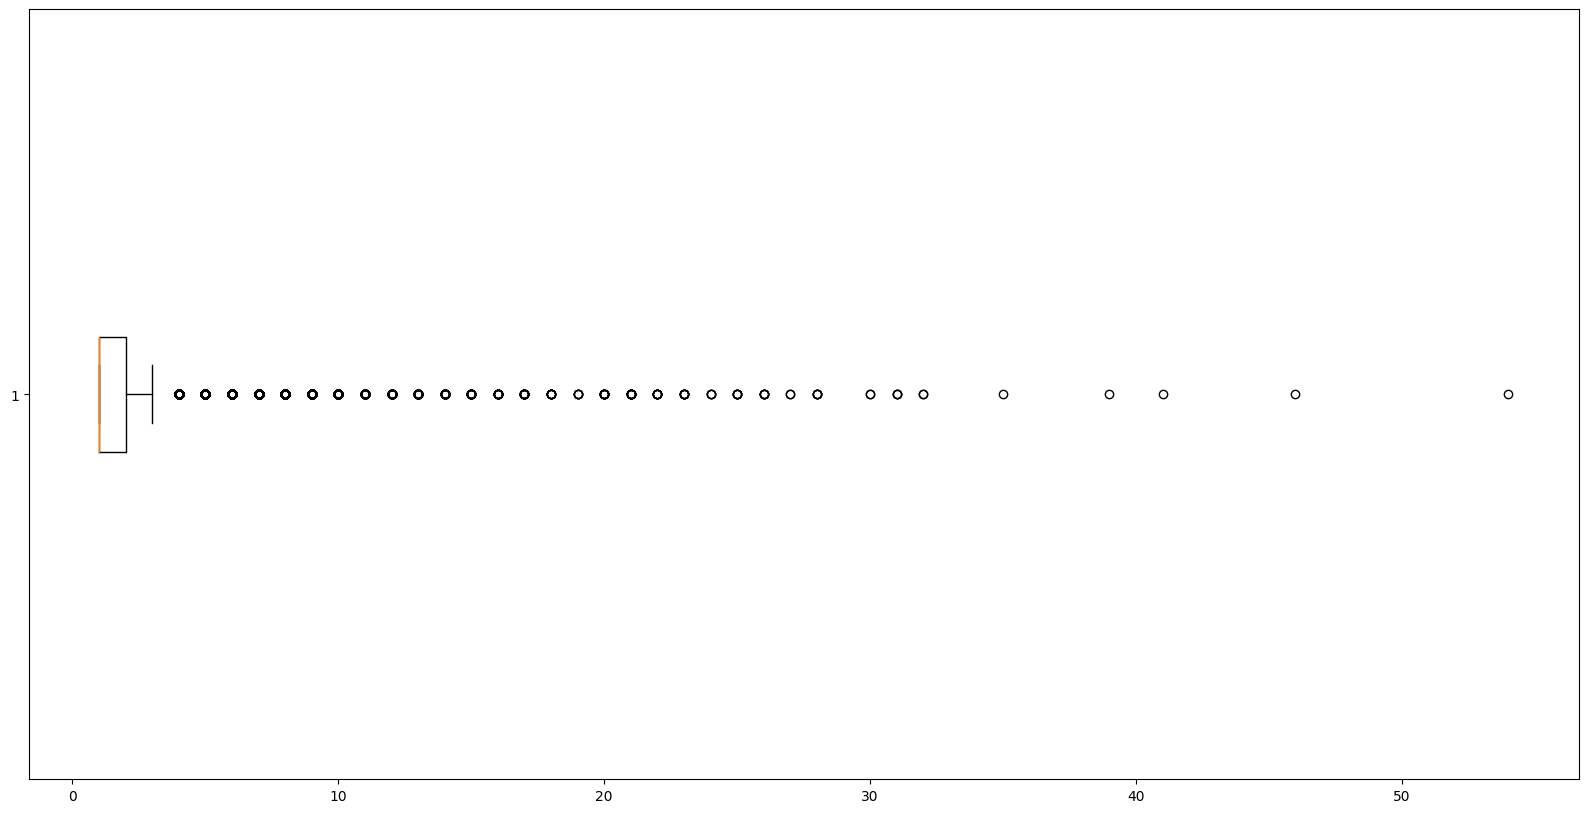

In [260]:
#create a boxplot for the number of arrests
plt.figure(figsize= (20,10))
plt.boxplot(NumofArrests, vert=False)
 
# show plot
plt.show()

From the boxplot, we can also see that there are some extreme outliers. 

In [261]:
#remove the outliers from NumofArrests
validNumofArrests = NumofArrests[NumofArrests < 20]
print(validNumofArrests)

333458    19
314062    19
323187    19
325247    19
321266    18
          ..
309949     1
325498     1
318570     1
324886     1
310583     1
Name: PersonID, Length: 37249, dtype: int64


In [262]:
validNumofArrests.describe()

count    37249.000000
mean         1.688663
std          1.701481
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         19.000000
Name: PersonID, dtype: float64

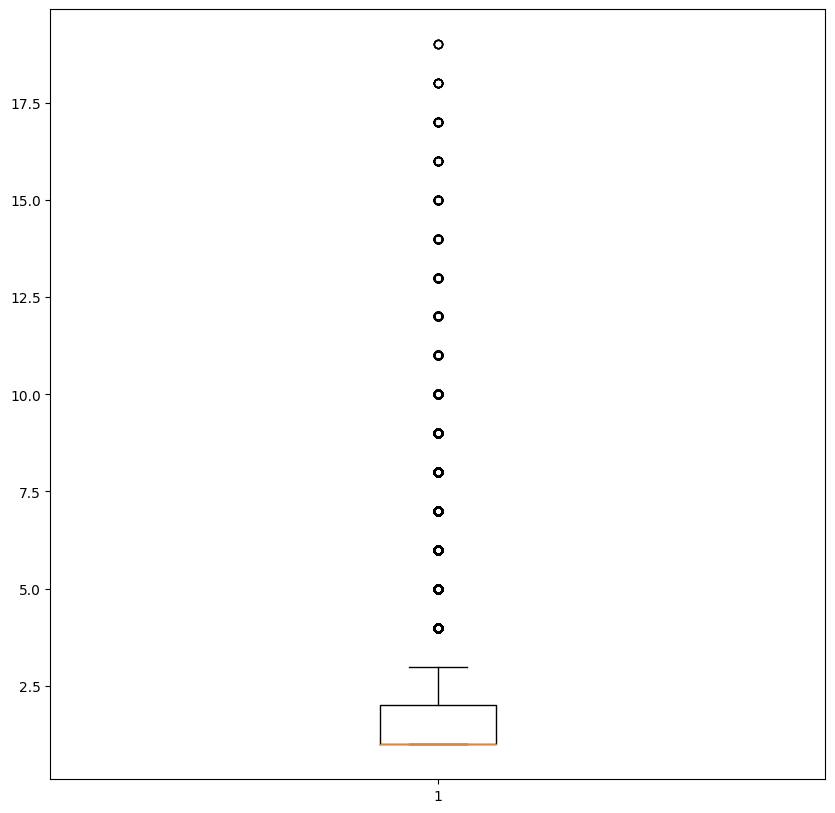

In [263]:
#create a boxplot for the number of arrests after the outliers have been taken out
plt.figure(figsize= (10,10))
plt.boxplot(validNumofArrests)
 
# show plot
plt.show()

In [264]:
pd.DataFrame({'PersonID':validNumofArrests.index, 'Number_of_Arrests':validNumofArrests.values})

,PersonID,Number_of_Arrests
0,333458,19
1,314062,19
2,323187,19
3,325247,19
4,321266,18
...,...,...
37244,309949,1
37245,325498,1
37246,318570,1
37247,324886,1


In [265]:
#For EDA, create a pandas series for the number of bookings
NumofBookings = df['Number_of_Bookings'].squeeze()
NumofBookings = df['Number_of_Bookings']
print(NumofBookings)

0        3
1        3
2        3
3        2
4        2
        ..
65271    0
65272    1
65273    0
65274    0
65275    0
Name: Number_of_Bookings, Length: 64798, dtype: int64


In [266]:
#View the descriptive statistics for the number of bookings
NumofBookings.describe()

count    64798.000000
mean         2.368592
std          3.514401
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         42.000000
Name: Number_of_Bookings, dtype: float64

In [267]:
NumofBookings.value_counts()

0     19128
1     18634
2      8308
3      5015
4      3552
5      2531
6      1622
7      1255
9       934
8       872
11      561
10      484
12      347
13      291
14      233
15      185
16      170
19      149
17      125
20       99
18       84
26       74
42       54
23       32
24       31
21       28
Name: Number_of_Bookings, dtype: int64

This shows that the maximum number of times that a person has been booked at a police station is 42, and the minimum is 0. This makes sense because not every person that has been arrested was booked at a police station following their arrest. The average number of times a person was booked is 2.37. The huge difference between the maximum of 42 and the 75th percentile of 3 suggest that there are extreme outliers.

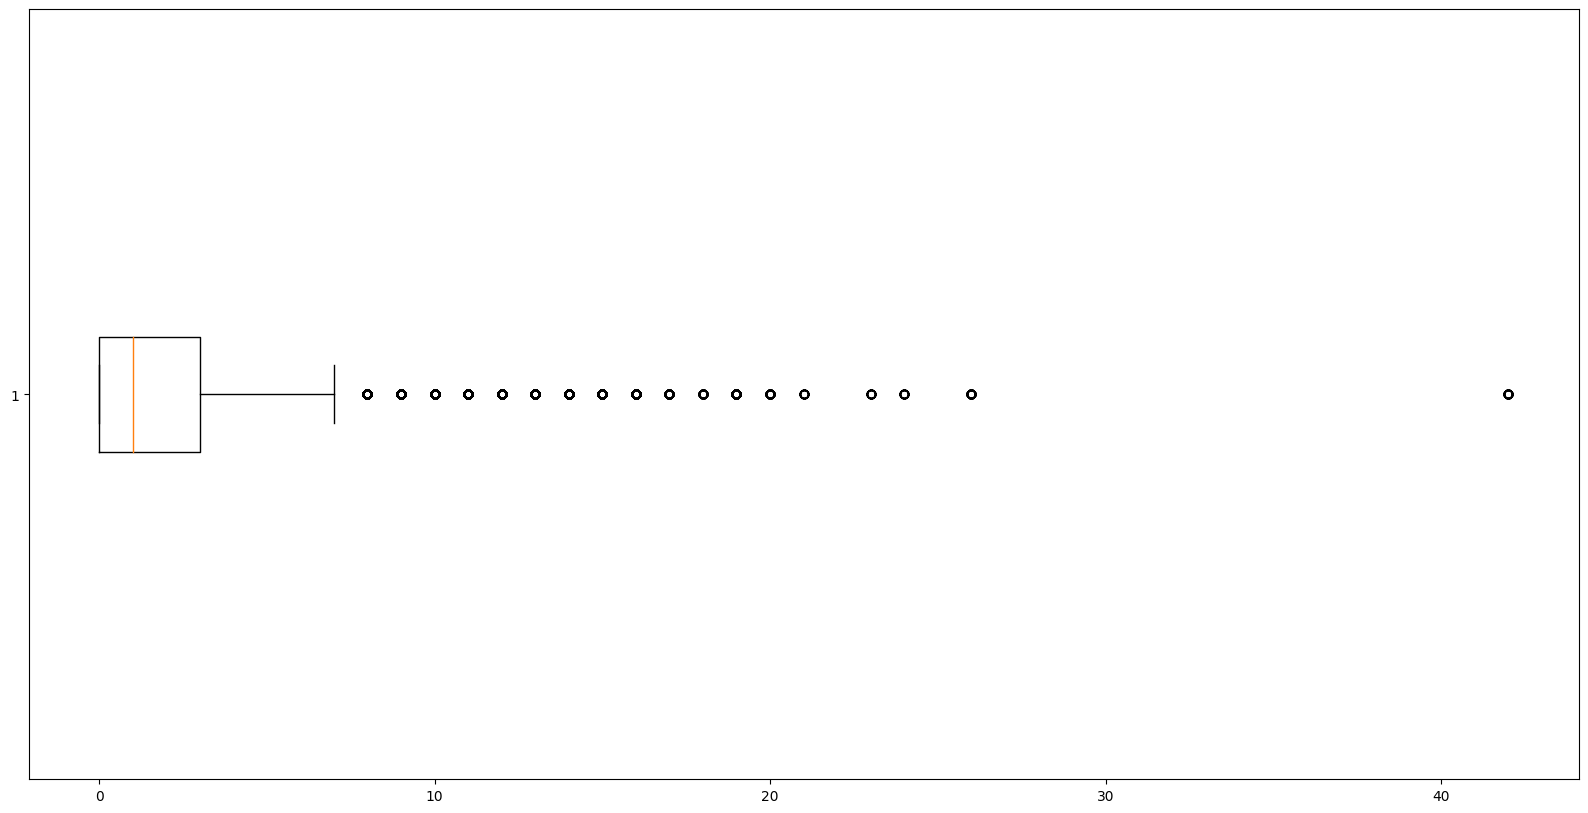

In [268]:
#create a boxplot for the number of bookingss
plt.figure(figsize= (20,10))
plt.boxplot(NumofBookings, vert=False)
 
# show plot
plt.show()

From the boxplot, we can also see that there are some extreme outliers. 

In [269]:
#remove the outliers from NumofBookings
validNumofBookings = NumofBookings[NumofBookings < 20]
print(validNumofBookings)

0        3
1        3
2        3
3        2
4        2
        ..
65271    0
65272    1
65273    0
65274    0
65275    0
Name: Number_of_Bookings, Length: 64480, dtype: int64


In [270]:
validNumofBookings.describe()

count    64480.000000
mean         2.252481
std          3.062336
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         19.000000
Name: Number_of_Bookings, dtype: float64

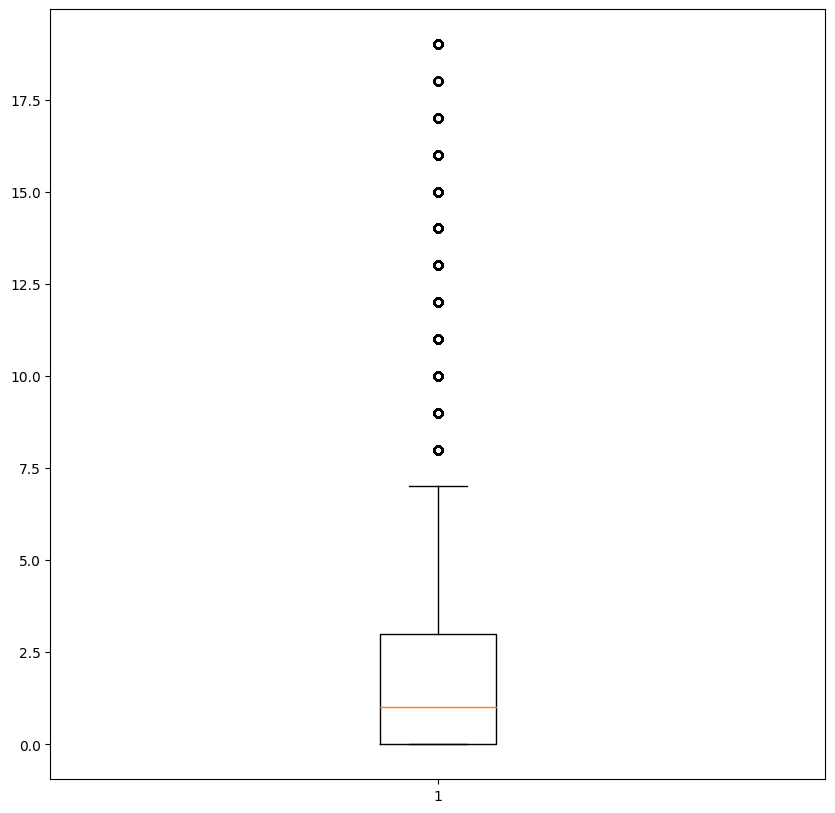

In [271]:
#create a boxplot for the number of bookings after the outliers have been taken out
plt.figure(figsize= (10,10))
plt.boxplot(validNumofBookings)
 
# show plot
plt.show()

In [272]:
#Add number of arrests as a column back to the dataframe
df['Number_of_Arrests'] = df.groupby('PersonID')['PersonID'].transform('count')
df

<ipython-input-272-695a38ea2c3c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Number_of_Arrests'] = df.groupby('PersonID')['PersonID'].transform('count')


,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Number_of_Bookings,Number_of_Arrests
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,2,3
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,1
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,1,1
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,1
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,1


In [273]:
#remove the outliers from the Number of Arrests column
#because the number of bookings does not exceed the number of arrests, by removing the outliers from the number of arrests, we have already removed the outliers from the number of bookings
df_valid_arrests = df[df['Number_of_Arrests'] < 20]
df_valid_arrests

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Number_of_Bookings,Number_of_Arrests
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,2,3
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,1
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,1,1
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,1
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,1


In [274]:
#remove the outliers from the Number of Bookings column
df_valid = df_valid_arrests[df_valid_arrests['Number_of_Bookings'] < 20]
df_valid

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Number_of_Bookings,Number_of_Arrests
0,2020,July-Sept,1005907,6017884.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
1,2020,July-Sept,1014562,6056669.0,326622,White,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
2,2020,Oct-Dec,1029922,6057065.0,326622,Unknown or Legacy,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault & Other crimes against persons,3,3
3,2021,Jan-Mar,1052190,6029059.0,327535,Black,M,Aged 25 to 34 years,Not a youth,XX,0,0,Harassment/Threatening,2,3
4,2021,Jan-Mar,1015512,6040372.0,327535,South Asian,M,Aged 25 to 34 years,Not a youth,XX,0,1,FTA/FTC/Compliance Check/Parollee,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65271,2021,Oct-Dec,1055609,6044336.0,316123,Indigenous,F,Aged 25 to 34 years,Not a youth,XX,0,0,Vehicle Related,0,1
65272,2021,Oct-Dec,1032758,6031692.0,307736,South Asian,M,Aged 35 to 44 years,Not a youth,54,0,1,Assault,1,1
65273,2021,Oct-Dec,1021067,6064396.0,324057,White,F,Aged 45 to 54 years,Not a youth,XX,0,0,Assault,0,1
65274,2021,Oct-Dec,1008998,6008662.0,331870,Unknown or Legacy,M,Aged 17 years and under,Youth (aged 17 years and under),XX,0,0,Robbery/Theft,0,1


In [275]:
#sort the dataframe by the number of bookings
df_valid.sort_values(by='Number_of_Bookings', inplace=True)
df_valid

,Arrest_Year,Arrest_Month,EventID,ArrestID,PersonID,Perceived_Race,Sex,Age_group__at_arrest_,Youth_at_arrest__under_18_years,ArrestLocDiv,StripSearch,Booked,Occurrence_Category,Number_of_Bookings,Number_of_Arrests
32821,2020,Jan-Mar,1033987,6048418.0,316889,Black,M,Aged 25 to 34 years,Not a youth,32,0,0,Assault & Other crimes against persons,0,1
34779,2021,Oct-Dec,1059789,6056159.0,304139,Black,M,Aged 18 to 24 years,Not a youth,XX,0,0,Robbery/Theft,0,2
34778,2020,Jan-Mar,1036974,6035004.0,304139,Black,M,Aged 18 to 24 years,Not a youth,52,0,0,Robbery & Theft,0,2
34775,2021,Oct-Dec,1019858,6045888.0,330896,Black,M,Aged 25 to 34 years,Not a youth,32,0,0,Assault,0,1
34767,2021,July-Sept,1034923,6017398.0,322946,White,M,Aged 35 to 44 years,Not a youth,XX,0,0,Assault,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15073,2020,July-Sept,1038880,6020603.0,306296,White,M,Aged 55 to 64 years,Not a youth,54,1,1,Sexual Related Crimes & Crimes Against Children,16,17
15074,2020,July-Sept,1053789,6055491.0,306296,White,M,Aged 55 to 64 years,Not a youth,54,1,1,"FTA/FTC, Compliance Check & Parollee",16,17
15075,2020,July-Sept,1040874,6056168.0,306296,White,M,Aged 55 to 64 years,Not a youth,54,1,1,"FTA/FTC, Compliance Check & Parollee",16,17
15077,2020,Oct-Dec,1007614,6045088.0,306296,White,M,Aged 55 to 64 years,Not a youth,54,0,1,"FTA/FTC, Compliance Check & Parollee",16,17


We can see that not every arrest leads to the person being booked at a police station. For the t-tests and ANCOVA, we wish to find out what variables affect the number of times a person is booked.

<ipython-input-326-2f9c86f74a22>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df_valid.corr()


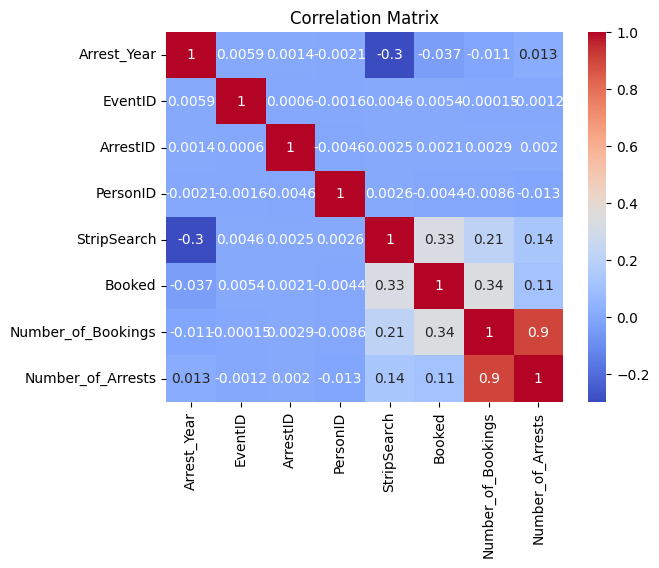

In [326]:
# Calculate the correlation matrix
corr_matrix = df_valid.corr()

# Plot the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Power Analysis

In [276]:
#function to calculate the pooled standard deviation of 2 samples
def pooled_standard_deviation(sample1,sample2):
    #calculate the sample size
    n1, n2 = len(sample1), len(sample2)
    #calculate the variances
    var1, var2 = np.var(sample1, ddof=1), np.var(sample2, ddof=1)
    #calculate the pooled standard deviation
    numerator = ((n1-1) * var1) + ((n2-1) * var2)
    denominator = n1+n2-2
    return np.sqrt(numerator/denominator)

# function to calculate Cohen's d for independent samples
def Cohens_d(sample1, sample2):
    u1, u2 = np.mean(sample1), np.mean(sample2)
    s_pooled = pooled_standard_deviation(sample1, sample2)
    #print(s_pooled)
    return ((u1 - u2) / s_pooled)

In [277]:
#create two different groups from the dataframe, one with all males and the other with all females
Males = df_valid[df_valid['Sex']=='M']
Females = df_valid[df_valid['Sex']=='F']

MaleBookings = Males['Number_of_Bookings']
FemaleBookings = Females['Number_of_Bookings']

In [278]:
#conduct power analysis 
from statsmodels.stats.power import TTestIndPower
effect_size = Cohens_d(MaleBookings,FemaleBookings)
alpha = 0.05
power = 0.8
ratio_ =len(MaleBookings)/len(FemaleBookings) #NB: ratio = nobs2/nobs1
print('Effect size (Cohen\'s D) for number of bookings:',effect_size)

Effect size (Cohen's D) for number of bookings: 0.12505849653857512


Prior to computing a t-test to analyze whether a person's number of bookings (outcome variable) differed between sexes, we calculated the effect size of the explanatory variable (sex) using Cohen's D metric, which was 0.13.

In [279]:
analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, nobs1=None, ratio=ratio_, alpha=alpha)
print('Sample Size of nobs1: %.3f' % sample_size, 'needed for Female Bookings') 
print('Actual size of FemaleBookings:', len(FemaleBookings))
nobs2 =ratio_*sample_size
print('Sample Size of nobs2: %.3f' % nobs2, 'needed for Male Bookings')
print('Actual size of MaleBookings:', len(MaleBookings))

Sample Size of nobs1: 623.064 needed for Female Bookings
Actual size of FemaleBookings: 12206
Sample Size of nobs2: 2587.763 needed for Male Bookings
Actual size of MaleBookings: 50695


After obtaining the effect size, the required sample size was computed using the obtained effect size and establishing the statistical power at 80%. The results indicated that a sample size of 623 was required for females, while a sample size of 2588 was required for males. This is significant because the sample size provided in the dataset are 12206 and 56895 respectively. Because the actual sample sizes exceed the sample sizes needed to achieve statistical power of 0.8, we do not need to worry about low sample sizes negatively affecting the statistical power.

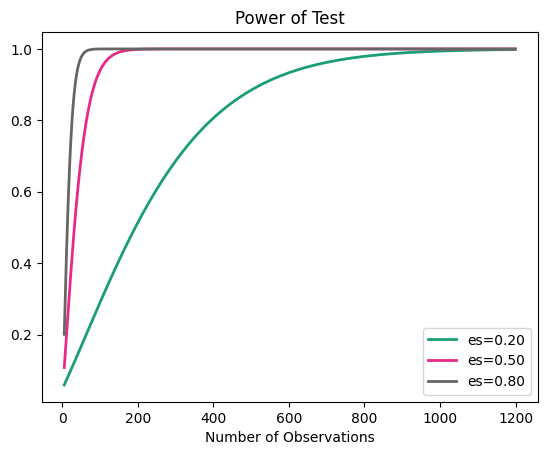

In [280]:
effect_sizes = np.array([0.2, 0.5, 0.8])
sample_sizes = np.array(range(5, 1200))
  
# plot power curves
analysis.plot_power(dep_var='nobs', nobs=sample_sizes,
               effect_size=effect_sizes)
  
plt.show()

From the power analysis curve, we can see that for all three effect sizes, as the number of observations surpass 1000, the statistical power is very close to 1.0. The risk of getting a Type II error is very low.



# T-tests


# 1st T-test: 
Research question for the 1st t-test: Is there a difference in the number of bookings between genders?
Independent variable: sex (male or female) of a person;
Dependent variable: number of bookings of that person.

In [281]:
#drop the columns not needed for t-test #1
df_ttest1 = df_valid[['PersonID', 'Sex', 'Number_of_Bookings']]
df_ttest1.sort_values(by='Number_of_Bookings', inplace=True)
df_ttest1

<ipython-input-281-122ef9d0e90c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ttest1.sort_values(by='Number_of_Bookings', inplace=True)


,PersonID,Sex,Number_of_Bookings
32821,316889,M,0
45504,320071,M,0
45512,321400,F,0
45513,330392,M,0
45514,311658,F,0
...,...,...,...
7863,333790,M,16
7862,333790,M,16
7861,333790,M,16
15076,306296,M,16


In [282]:
#display the number of samples in each sex group
group_m = df_ttest1[df_ttest1['Sex'] == 'M']['Number_of_Bookings']
group_f = df_ttest1[df_ttest1['Sex'] == 'F']['Number_of_Bookings']
print(group_m. count())
print(group_f.count())

50695
12206


In [283]:
#to ensure the accuracy of the t-test, we need to make sure the sample groups have the same size
#to do this, we randomly select 10000 samples from each group
#From our power analysis, because each group contains more than 1000 observations, we can expect the power to be very close to 1.0.
ttest_m = group_m.sample(n = 10000)
ttest_f = group_f.sample(n = 10000)

In [284]:
print(ttest_m. describe())
print(ttest_f.describe())

count    10000.000000
mean         2.009300
std          2.447205
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         16.000000
Name: Number_of_Bookings, dtype: float64
count    10000.000000
mean         1.733100
std          2.391409
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         13.000000
Name: Number_of_Bookings, dtype: float64


In [285]:
ttest_m

56852     1
48746     5
34945     2
4493      1
40561     0
         ..
60291     0
13636    10
53918     0
13159     2
56487     7
Name: Number_of_Bookings, Length: 10000, dtype: int64

# Check Assumptions

The two samples, males and females, are mutually exclusive and therefore independent

Check if the sampling distribution is normally distributed

In [286]:
#We use the Shapiro-Wilk test to test for normal distribution
from scipy.stats import shapiro

print(shapiro(ttest_m))
print(shapiro(ttest_f))

ShapiroResult(statistic=0.7646862268447876, pvalue=0.0)
ShapiroResult(statistic=0.7301939725875854, pvalue=0.0)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Because both p values are smaller than 0.05, neither of the variables violates the assumption of normality.

Homogeneity of Variance

In [287]:
#We use Levene's test to test for normal distribution
stats.levene(ttest_m, ttest_f)

LeveneResult(statistic=4.561621855188216, pvalue=0.03270820642204124)

Because the p-value is smaller than 0.05, the test is not significant, meaning that there is homogeneity of variances

In [288]:
#conduct the 1st t-test
rp.ttest(group1= ttest_m, group1_name= "Male",
         group2= ttest_f, group2_name= "Female")

/usr/local/lib/python3.9/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(   Variable        N    Mean        SD        SE  95% Conf.  Interval
 0      Male  10000.0  2.0093  2.447205  0.024472   1.961330  2.057270
 1    Female  10000.0  1.7331  2.391409  0.023914   1.686224  1.779976
 2  combined  20000.0  1.8712  2.423346  0.017136   1.837613  1.904787,
               Independent t-test     results
 0  Difference (Male - Female) =       0.2762
 1          Degrees of freedom =   19998.0000
 2                           t =       8.0721
 3       Two side test p value =       0.0000
 4      Difference < 0 p value =       1.0000
 5      Difference > 0 p value =       0.0000
 6                   Cohen's d =       0.1142
 7                   Hedge's g =       0.1142
 8              Glass's delta1 =       0.1129
 9            Point-Biserial r =       0.0570)

Interpretation for the 1st t-test: An independent samples t-test was run to determine if there were differences in the number of bookings between males and females. The mean number of bookings for males (M = 2.01, SD = 2.45) was higher than that of females (M = 1.73, SD = 2.40), a statistically significant difference, t(19998) = 8.07, p = 0.00 < 0.05.

# 2nd T-test

Research question for the 2nd t-test: Is there a difference in the number of bookings between youths and non-youths? Independent variable: youth or non-youth. Dependent variable: number of bookings.

In [289]:
#drop the columns not needed for t-test #2
df_ttest2 = df_valid[['PersonID', 'Youth_at_arrest__under_18_years', 'Number_of_Bookings']]
df_ttest2

,PersonID,Youth_at_arrest__under_18_years,Number_of_Bookings
32821,316889,Not a youth,0
34779,304139,Not a youth,0
34778,304139,Not a youth,0
34775,330896,Not a youth,0
34767,322946,Not a youth,0
...,...,...,...
15073,306296,Not a youth,16
15074,306296,Not a youth,16
15075,306296,Not a youth,16
15077,306296,Not a youth,16


In [290]:
#display the number of samples in the youth group and the non-youth group
group_y = df_ttest2[df_ttest2['Youth_at_arrest__under_18_years'] != 'Not a youth']['Number_of_Bookings']
group_noty = df_ttest2[df_ttest2['Youth_at_arrest__under_18_years'] == 'Not a youth']['Number_of_Bookings']
print(group_m. count())
print(group_f.count())

50695
12206


In [291]:
#to ensure the accuracy of the t-test, we need to make sure the sample groups have the same size
#to do this, we randomly select 10000 samples from each group
ttest_y = group_y.sample(n = 10000, replace=True)
ttest_noty = group_noty.sample(n = 10000, replace=True)

# Check Assumptions

The two samples, not a youth and youth, are mutually exclusive and therefore independent

Check if the sampling distribution is normally distributed

In [292]:
#We use the Shapiro-Wilk test to test for normal distribution
from scipy.stats import shapiro

print(shapiro(ttest_y))
print(shapiro(ttest_noty))

ShapiroResult(statistic=0.7088593244552612, pvalue=0.0)
ShapiroResult(statistic=0.7670724391937256, pvalue=0.0)


/usr/local/lib/python3.9/dist-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Because both p values are smaller than 0.05, neither of the variables violates the assumption of normality.

Homogeneity of Variance

In [293]:
#We use Levene's test to test for normal distribution
stats.levene(ttest_y, ttest_noty)

LeveneResult(statistic=421.8434527099178, pvalue=8.779950025904727e-93)

Because the p-value is smaller than 0.05, the test is not significant, meaning that there is homogeneity of variances

In [294]:
#conduct the 2nd t-test
rp.ttest(group1= ttest_noty, group1_name= "Not a Youth",
         group2= ttest_y, group2_name= "Youth")

/usr/local/lib/python3.9/dist-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


(      Variable        N    Mean        SD        SE  95% Conf.  Interval
 0  Not a Youth  10000.0  2.0075  2.457122  0.024571   1.959335  2.055665
 1        Youth  10000.0  1.1781  1.666571  0.016666   1.145432  1.210768
 2     combined  20000.0  1.5928  2.139911  0.015131   1.563141  1.622459,
                     Independent t-test     results
 0  Difference (Not a Youth - Youth) =       0.8294
 1                Degrees of freedom =   19998.0000
 2                                 t =      27.9354
 3             Two side test p value =       0.0000
 4            Difference < 0 p value =       1.0000
 5            Difference > 0 p value =       0.0000
 6                         Cohen's d =       0.3951
 7                         Hedge's g =       0.3951
 8                    Glass's delta1 =       0.3375
 9                  Point-Biserial r =       0.1938)

Interpretation for the 2nd t-test: An independent samples t-test was run to determine if there were differences in the number of bookings between non-youths and youths. The number of bookings of non-youths (M = 2.01, SD = 2.46) was higher than that of youths (M = 1.18, SD = 1.67), a statistically significant difference, t(19998) = 27.94, p = 0.00 < 0.05.

# ANCOVA


The research question for the ANCOVA is as follows: Is there a difference in the number of arrests based on the person’s perceived race (White, Black, or Latino)? (RQa1)

In [295]:
!pip install pingouin #if not installed on your virtual env then pip install 

import pandas as pd
from pingouin import ancova
pd.options.display.max_columns = None #show all columns in data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [296]:
df_valid['Perceived_Race'].unique() #Check the categories of perceived race.

array(['Black', 'White', 'East/Southeast Asian', 'Unknown or Legacy',
       'Indigenous', 'South Asian', 'Latino', 'Middle-Eastern', nan],
      dtype=object)

In [297]:
#for the ANCOVA, we are only examining three races, White, Black, and Latino.
#we trim the dataframe down to these three racial categories, together with the personID, the number of arrestes, and the number of bookings. create the x_1 variable with these three categories
df_ancova = df_valid[['PersonID', 'Perceived_Race', 'Number_of_Arrests', 'Number_of_Bookings']]
df_ancova = df_ancova.loc[(df_ancova['Perceived_Race'] == 'Black') | (df_ancova['Perceived_Race'] == 'White') |  (df_ancova['Perceived_Race'] == 'Latino')]
df_ancova

,PersonID,Perceived_Race,Number_of_Arrests,Number_of_Bookings
32821,316889,Black,1,0
34779,304139,Black,2,0
34778,304139,Black,2,0
34775,330896,Black,1,0
34767,322946,White,1,0
...,...,...,...,...
15073,306296,White,17,16
15074,306296,White,17,16
15075,306296,White,17,16
15077,306296,White,17,16


In [298]:
df_ancova['Perceived_Race'].unique() #x_1, a categorical variable

array(['Black', 'White', 'Latino'], dtype=object)

In [299]:
df_ancova['Number_of_Arrests'].unique() # x_2, which is NOT a categorical variable but another continuous variable 

array([ 1,  2,  3,  4,  5,  6,  9,  8, 10,  7, 13, 12, 15, 11, 14, 16, 17,
       18, 19])

In [300]:
df_ancova['Number_of_Bookings'].unique() #the dependent variable 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [301]:
#inspect the data is stored correctly in the df
df_ancova.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45194 entries, 32821 to 7864
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PersonID            45194 non-null  int64 
 1   Perceived_Race      45194 non-null  object
 2   Number_of_Arrests   45194 non-null  int64 
 3   Number_of_Bookings  45194 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.7+ MB


In [302]:
#check the number of data points for each racial group
bookings_w = df_ancova[df_ancova['Perceived_Race'] == 'White']['Number_of_Bookings']
bookings_b = df_ancova[df_ancova['Perceived_Race'] == 'Black']['Number_of_Bookings']
bookings_l = df_ancova[df_ancova['Perceived_Race'] == 'Latino']['Number_of_Bookings']
print(bookings_w.describe())
print(bookings_b.describe())
print(bookings_l.describe())

count    26532.000000
mean         2.185474
std          2.566534
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         16.000000
Name: Number_of_Bookings, dtype: float64
count    16937.000000
mean         2.012517
std          2.477620
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         16.000000
Name: Number_of_Bookings, dtype: float64
count    1725.000000
mean        1.615072
std         1.929802
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max        12.000000
Name: Number_of_Bookings, dtype: float64


In [304]:
#we can see that the sample size for each racial group is not equal.
#For a balanced design, we need to make sure the sample sizes for each group are equal.
#Thus, we need to select 1000 random samples from each group
df_w = df_ancova.loc[(df_ancova['Perceived_Race'] == 'White')]
df_b = df_ancova.loc[(df_ancova['Perceived_Race'] == 'Black')]
df_l = df_ancova.loc[(df_ancova['Perceived_Race'] == 'Latino')]
df_w_ancova = df_w.sample(n = 1000)
df_b_ancova = df_b.sample(n = 1000)
df_l_ancova = df_l.sample(n = 1000)

In [305]:
print(df_l_ancova)

       PersonID Perceived_Race  Number_of_Arrests  Number_of_Bookings
26451    305691         Latino                  3                   2
38193    319293         Latino                  1                   0
45733    330025         Latino                  2                   2
50792    325358         Latino                  1                   1
54475    309576         Latino                  1                   1
...         ...            ...                ...                 ...
61973    308098         Latino                  1                   1
58229    324875         Latino                  2                   0
45675    310725         Latino                  1                   0
52146    324634         Latino                  1                   0
830      314008         Latino                  4                   3

[1000 rows x 4 columns]


In [306]:
df_ancova_balanced = df_w_ancova.merge(df_b_ancova,how ='outer').merge(df_l_ancova,how ='outer')

print(df_ancova_balanced)

      PersonID Perceived_Race  Number_of_Arrests  Number_of_Bookings
0       331232          White                  1                   0
1       307924          White                  1                   1
2       327498          White                 17                  11
3       327498          White                 17                  11
4       320577          White                  4                   4
...        ...            ...                ...                 ...
2995    322279         Latino                  1                   1
2996    308098         Latino                  1                   1
2997    324875         Latino                  2                   0
2998    310725         Latino                  1                   0
2999    324634         Latino                  1                   0

[3000 rows x 4 columns]


# Check Assumptions for ANCOVA







Independence of observations: There is no relationship between the three groups as they come from three different racial groups.

The data is normally distributed

In [307]:
df_ancova_balanced['Number_of_Bookings']

0        0
1        1
2       11
3       11
4        4
        ..
2995     1
2996     1
2997     0
2998     0
2999     0
Name: Number_of_Bookings, Length: 3000, dtype: int64

In [308]:
#Residuals (experimental error) are approximately normally distributed
#we test this using the Shapiro-Wilk test
shapiro(df_ancova_balanced['Number_of_Bookings'])

ShapiroResult(statistic=0.7634650468826294, pvalue=0.0)

Since the p-value is less than .05, we reject the null hypothesis of the Shapiro-Wilk test.

This means we have sufficient evidence to say that the sample data does not come from a normal distribution.

Homogeneity of variances 

In [309]:
!pip3 install scikit-learn scipy bioinfokit 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [327]:
from bioinfokit.analys import stat 
res = stat()
res.levene(df=df_ancova_balanced, res_var='Number_of_Bookings', xfac_var='Perceived_Race')
res.levene_summary

,Parameter,Value
0,Test statistics (W),24.9548
1,Degrees of freedom (Df),2.0000
2,p value,0.0000


Because the p-value is smaller than 0.05, we reject the null hypothesis and conclude that the variance among different groups is not equal. In other words, at least one pair the variance is not equal to others

The dependent variable (Number of Bookings) is measured at the continuous level.

# Running 1-way ANCOVA

In [311]:
#run the 1-way ANCOVA
ancova(data=df_ancova_balanced, dv='Number_of_Bookings', covar='Number_of_Arrests', between='Perceived_Race')

,Source,SS,DF,F,p-unc,np2
0,Perceived_Race,12.356413,2,6.151749,0.002157,0.004090
1,Number_of_Arrests,13485.945598,1,13428.192709,0.000000,0.817586
2,Residual,3008.885402,2996,NaN,NaN,NaN


Interpretation: p-unc = “uncorrected p-value” for Perceived Race is smaller than 0.05. We thus reject the null hypothesis that the means of the number of bookings for the three perceived races are equal, controlling for the number of arrests.

# Logistic Regression

The research question for the logistic regression is as follows: Do the number of arrests and sex have an influence on a person being booked at a police station (yes or no) (RQ4)?

In [312]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [313]:
df_logit =  df_valid[['PersonID', 'Sex', 'Number_of_Arrests', 'Booked']]
df_logit

,PersonID,Sex,Number_of_Arrests,Booked
32821,316889,M,1,0
34779,304139,M,2,0
34778,304139,M,2,0
34775,330896,M,1,0
34767,322946,M,1,0
...,...,...,...,...
15073,306296,M,17,1
15074,306296,M,17,1
15075,306296,M,17,1
15077,306296,M,17,1


In [314]:
df_logit.Booked.replace((1, 0),('yes', 'no'), inplace=True)

<ipython-input-314-f124c8672733>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_logit.Booked.replace((1, 0),('yes', 'no'), inplace=True)


In [315]:
x = df_logit[['Sex', 'Number_of_Arrests']].copy()
x['Sex'] = pd.get_dummies(df_logit.Sex, drop_first=True)

In [316]:
y = pd.get_dummies(df_logit.Booked, drop_first=True)

In [317]:
x.groupby('Sex').size()

Sex
0    12206
1    50695
dtype: int64

In [318]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62901 entries, 32821 to 7864
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Sex                62901 non-null  uint8
 1   Number_of_Arrests  62901 non-null  int64
dtypes: int64(1), uint8(1)
memory usage: 1.0 MB


In [319]:
y

,yes
32821,0
34779,0
34778,0
34775,0
34767,0
...,...
15073,1
15074,1
15075,1
15077,1


In [320]:
y.info

<bound method DataFrame.info of        yes
32821    0
34779    0
34778    0
34775    0
34767    0
...    ...
15073    1
15074    1
15075    1
15077    1
7864     1

[62901 rows x 1 columns]>

In [321]:
y['yes'].unique()

array([0, 1], dtype=uint8)

In [322]:
# Split these data into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=123)

In [323]:
y_train

,yes
19584,0
45214,1
19754,1
26351,1
47676,1
...,...
41390,1
5170,0
36596,0
10738,0


In [324]:
#building the model with statsmodels
import statsmodels.formula.api as smf

# Create the formula string 
all_columns = ' + '.join(x)
formula = "yes ~ " + all_columns 
print("Formula: ", formula, "\n")

# Put the training predictors and responses into one DataFrame to be input into the model
trainingdata = pd.concat([x_train,y_train], axis = 1)

# Build the model
log_reg_1 = smf.logit(formula, data=trainingdata).fit()

Formula:  yes ~ Sex + Number_of_Arrests 

Optimization terminated successfully.
         Current function value: 0.682479
         Iterations 4


In [325]:
log_reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    yes   No. Observations:                50320
Model:                          Logit   Df Residuals:                    50317
Method:                           MLE   Df Model:                            2
Date:                Mon, 17 Apr 2023   Pseudo R-squ.:                 0.01420
Time:                        01:54:06   Log-Likelihood:                -34342.
converged:                       True   LL-Null:                       -34837.
Covariance Type:            nonrobust   LLR p-value:                1.364e-215
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.4915      0.022    -21.943      0.000      -0.535      -0.448
Sex                   0.4459      0.023     19.475      0.000       0.401       0.491
Number_of_Arrests     0.0637      0.003     23.895      0.000       0.058       0.069
=====================================================================================
"""

We performed a logistic regression to examine the effects of sex and the number of arrests on whether a person is booked at a police station. None of the features are statistically significant.